<a href="https://colab.research.google.com/github/timothhhyf/DISEASE_PREDICTION_USING_MACHINE_LEARNING_WITH_GUI/blob/main/DISEASE_PREDICTION_USING_MACHINE_LEARNING_WITH_GUI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import the libraries that will be used**

In [ ]:
import numpy as np #perform a wide variety of mathematical operations on arrays
import pandas as pd #perform action for data
import matplotlib.pyplot as plt #perform the creation of the plot
import seaborn as sn #perform the making of statistical graphics

from sklearn import metrics #perform the calculation of metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVR #perform SVR
from sklearn.model_selection import train_test_split #perform the splitting data
from sklearn.ensemble import RandomForestClassifier #perform the classifier (random forest)
from matplotlib.colors import ListedColormap

**Read training data and drop the empty data**

In [ ]:
data = pd.read_csv("/content/Training.csv")

data = data.dropna()
print(data.info())
print(data.isna().values.any())
data.head(25)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB
None
False


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
5,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
6,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
7,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
8,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
9,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


**Describe the data for info**

In [ ]:
data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Split dataset into training set and test set (70% training 30% test)**

In [ ]:
X, y = data.iloc[:,:-1], data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

**Make Gaussian classifier and train the model**

In [ ]:
clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test) #as the training sets

**Checking the accuracy**

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy :",metrics.accuracy_score(y_test, y_pred))
print("")

[[32  0  0 ...  0  0  0]
 [ 0 31  0 ...  0  0  0]
 [ 0  0 38 ...  0  0  0]
 ...
 [ 0  0  0 ... 36  0  0]
 [ 0  0  0 ...  0 38  0]
 [ 0  0  0 ...  0  0 38]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        32
                                   AIDS       1.00      1.00      1.00        31
                                   Acne       1.00      1.00      1.00        38
                    Alcoholic hepatitis       1.00      1.00      1.00        34
                                Allergy       1.00      1.00      1.00        33
                              Arthritis       1.00      1.00      1.00        36
                       Bronchial Asthma       1.00      1.00      1.00        39
                   Cervical spondylosis       1.00      1.00      1.00        41
                            Chicken pox       1.00      1.00      1.00        33
                    Chronic chole

**See the feature importance score**

In [ ]:
featureImp = pd.Series(clf.feature_importances_,index=list(data.columns[:-1])).sort_values(ascending=False).head(50)

featureImp[::-1]

knee_pain                         0.008395
shivering                         0.008417
skin_peeling                      0.008418
cough                             0.008467
neck_pain                         0.008609
polyuria                          0.008684
stomach_bleeding                  0.008763
fast_heart_rate                   0.008814
mucoid_sputum                     0.009290
breathlessness                    0.009379
slurred_speech                    0.009387
dehydration                       0.009553
abdominal_pain                    0.009755
malaise                           0.009807
nodal_skin_eruptions              0.009863
yellowish_skin                    0.009950
internal_itching                  0.010178
altered_sensorium                 0.010258
receiving_unsterile_injections    0.010258
dischromic _patches               0.010454
coma                              0.010748
fluid_overload.1                  0.010809
loss_of_balance                   0.010979
bladder_dis

In [ ]:
featureImp[::-1].index

Index(['knee_pain', 'shivering', 'skin_peeling', 'cough', 'neck_pain',
       'polyuria', 'stomach_bleeding', 'fast_heart_rate', 'mucoid_sputum',
       'breathlessness', 'slurred_speech', 'dehydration', 'abdominal_pain',
       'malaise', 'nodal_skin_eruptions', 'yellowish_skin', 'internal_itching',
       'altered_sensorium', 'receiving_unsterile_injections',
       'dischromic _patches', 'coma', 'fluid_overload.1', 'loss_of_balance',
       'bladder_discomfort', 'stomach_pain', 'weight_loss', 'back_pain',
       'pain_behind_the_eyes', 'patches_in_throat', 'loss_of_appetite',
       'dark_urine', 'rusty_sputum', 'muscle_weakness', 'red_spots_over_body',
       'sweating', 'joint_pain', 'high_fever', 'diarrhoea', 'chest_pain',
       'lack_of_concentration', 'fatigue', 'unsteadiness', 'vomiting',
       'headache', 'mild_fever', 'nausea', 'family_history',
       'yellowing_of_eyes', 'itching', 'muscle_pain'],
      dtype='object')

**Ploting the feature importance**

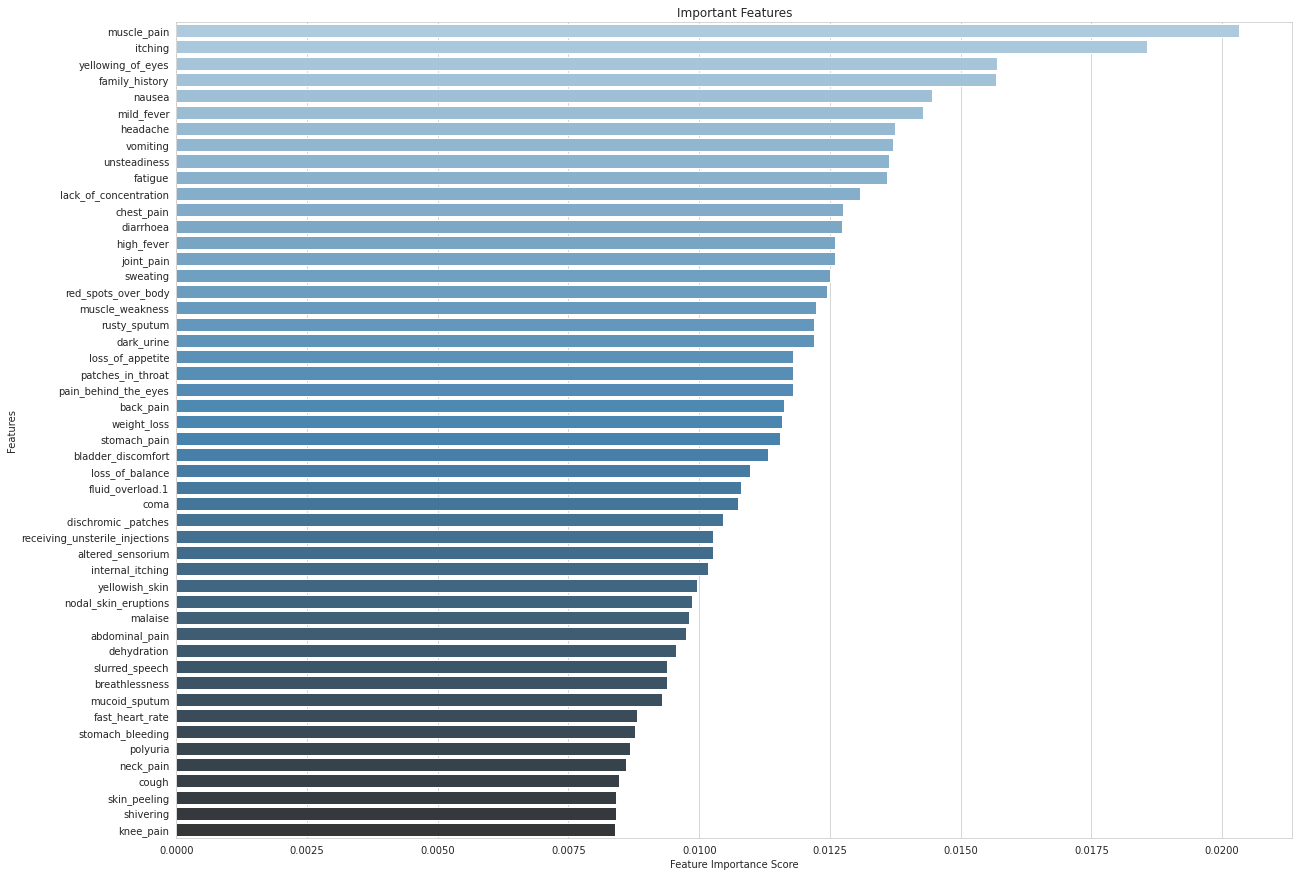

In [ ]:
%matplotlib inline

figure = plt.gcf()
figure.set_size_inches(20,15)

sn.set_style("whitegrid")
sn.barplot(x=featureImp, y=featureImp.index, palette='Blues_d',color='white')

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features")
plt.show()

**Split dataset into training set and test set (70% training 30% test)**

In [ ]:
X_reduced, y = data[['receiving_blood_transfusion', 'red_sore_around_nose',
       'abnormal_menstruation', 'continuous_sneezing', 'breathlessness',
       'blackheads', 'shivering', 'dizziness', 'back_pain', 'unsteadiness',
       'yellow_crust_ooze', 'muscle_weakness', 'loss_of_balance', 'chills',
       'ulcers_on_tongue', 'stomach_bleeding', 'lack_of_concentration', 'coma',
       'neck_pain', 'weakness_of_one_body_side', 'diarrhoea',
       'receiving_unsterile_injections', 'headache', 'family_history',
       'fast_heart_rate', 'pain_behind_the_eyes', 'sweating', 'mucoid_sputum',
       'spotting_ urination', 'sunken_eyes', 'dischromic _patches', 'nausea',
       'dehydration', 'loss_of_appetite', 'abdominal_pain', 'stomach_pain',
       'yellowish_skin', 'altered_sensorium', 'chest_pain', 'muscle_wasting',
       'vomiting', 'mild_fever', 'high_fever', 'red_spots_over_body',
       'dark_urine', 'itching', 'yellowing_of_eyes', 'fatigue', 'joint_pain',
       'muscle_pain']], data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=0)

X_reduced.head()

,receiving_blood_transfusion,red_sore_around_nose,abnormal_menstruation,continuous_sneezing,breathlessness,blackheads,shivering,dizziness,back_pain,unsteadiness,...,vomiting,mild_fever,high_fever,red_spots_over_body,dark_urine,itching,yellowing_of_eyes,fatigue,joint_pain,muscle_pain
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


**Make Gaussian classifier and train the model**

In [ ]:
clf2=RandomForestClassifier(n_estimators=100)

clf2.fit(X_train,y_train)

y_pred=clf2.predict(X_test) #as the training sets

**Checking the accuracy**

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy :",metrics.accuracy_score(y_test, y_pred))
print("")

[[32  0  0 ...  0  0  0]
 [ 0 31  0 ...  0  0  0]
 [ 0  0 36 ...  2  0  0]
 ...
 [ 0  0  0 ... 36  0  0]
 [ 0  0  0 ...  3  0  0]
 [ 0  0  0 ...  0  0 38]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        32
                                   AIDS       1.00      1.00      1.00        31
                                   Acne       1.00      0.95      0.97        38
                    Alcoholic hepatitis       1.00      0.97      0.99        34
                                Allergy       1.00      1.00      1.00        33
                              Arthritis       1.00      0.92      0.96        36
                       Bronchial Asthma       1.00      1.00      1.00        39
                   Cervical spondylosis       1.00      1.00      1.00        41
                            Chicken pox       1.00      1.00      1.00        33
                    Chronic chole

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**See the feature importance score**

In [ ]:
featureImp2 = pd.Series(clf2.feature_importances_,index=list(X_reduced.columns)).sort_values(ascending=False)

featureImp2[::-1]

sunken_eyes                       0.006359
ulcers_on_tongue                  0.009202
dehydration                       0.009212
spotting_ urination               0.009575
continuous_sneezing               0.010151
mucoid_sputum                     0.010427
weakness_of_one_body_side         0.010875
red_sore_around_nose              0.011037
receiving_unsterile_injections    0.011443
coma                              0.011561
stomach_bleeding                  0.012124
receiving_blood_transfusion       0.012434
altered_sensorium                 0.012812
dizziness                         0.012967
pain_behind_the_eyes              0.013069
yellow_crust_ooze                 0.013173
lack_of_concentration             0.013779
unsteadiness                      0.015148
red_spots_over_body               0.015535
dark_urine                        0.016024
shivering                         0.016080
loss_of_balance                   0.016303
family_history                    0.016498
back_pain  

In [ ]:
featureImp2[::-1].index

Index(['sunken_eyes', 'ulcers_on_tongue', 'dehydration', 'spotting_ urination',
       'continuous_sneezing', 'mucoid_sputum', 'weakness_of_one_body_side',
       'red_sore_around_nose', 'receiving_unsterile_injections', 'coma',
       'stomach_bleeding', 'receiving_blood_transfusion', 'altered_sensorium',
       'dizziness', 'pain_behind_the_eyes', 'yellow_crust_ooze',
       'lack_of_concentration', 'unsteadiness', 'red_spots_over_body',
       'dark_urine', 'shivering', 'loss_of_balance', 'family_history',
       'back_pain', 'muscle_wasting', 'breathlessness', 'dischromic _patches',
       'chills', 'stomach_pain', 'fast_heart_rate', 'yellowing_of_eyes',
       'blackheads', 'mild_fever', 'yellowish_skin', 'diarrhoea',
       'loss_of_appetite', 'sweating', 'muscle_pain', 'chest_pain',
       'neck_pain', 'abnormal_menstruation', 'nausea', 'muscle_weakness',
       'abdominal_pain', 'itching', 'joint_pain', 'vomiting', 'headache',
       'high_fever', 'fatigue'],
      dtype='objec

**Ploting the feature importance**

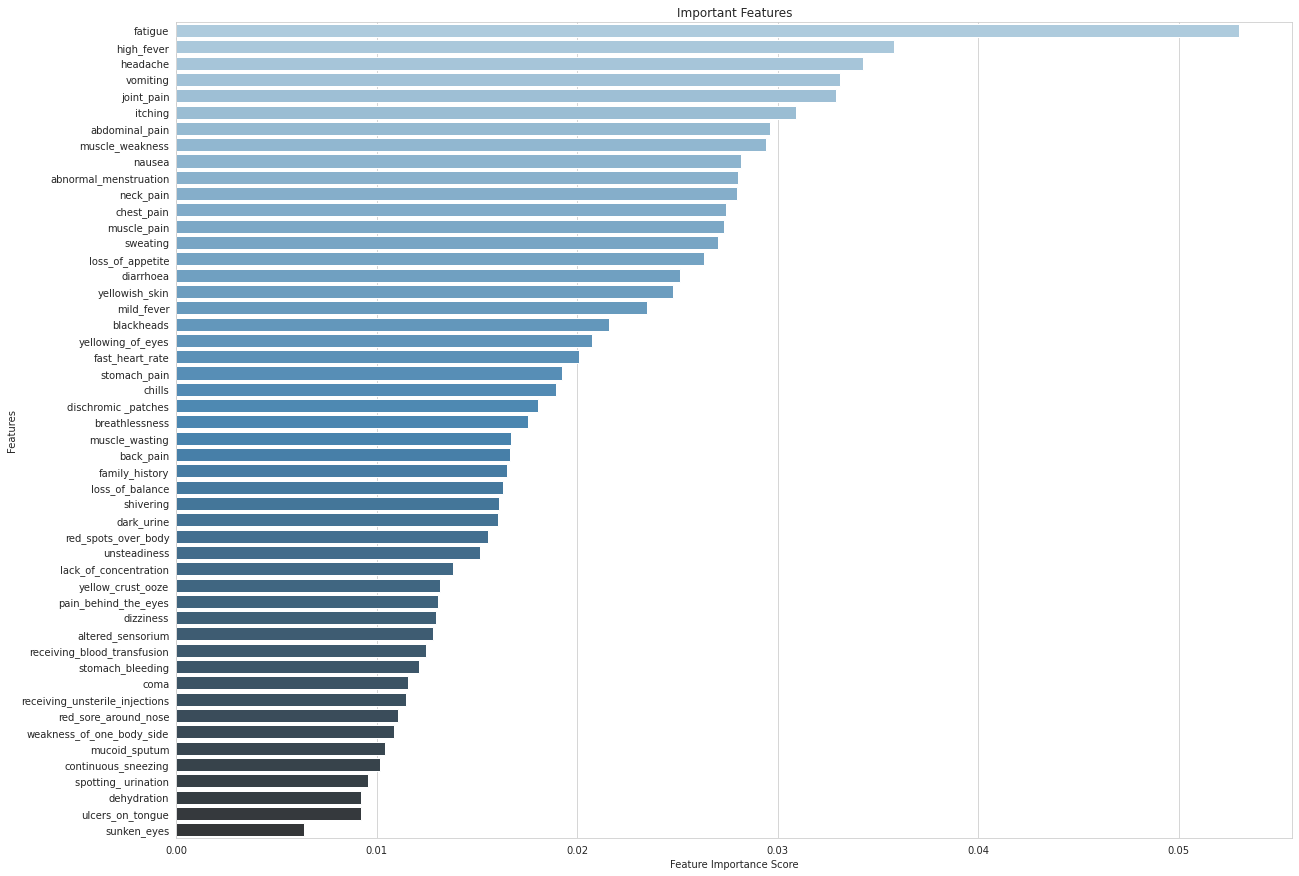

In [ ]:
%matplotlib inline

figure = plt.gcf()
figure.set_size_inches(20,15)

sn.set_style("whitegrid")
sn.barplot(x=featureImp2, y=featureImp2.index, palette='Blues_d',color='white')

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features")
plt.show()